# Multiple Regression
#####    Practical assignment 6

This practical assignment need to be handed in on Brightspace before the deadline, 23:30 29/05/2020. Even though you are working in pairs, each student has to hand in their own assignment. Make sure that every cell is executed/compiled and renamed to 

**Assignment6_Surname1_Surname2.ipynb**

before submitting. For questions contact your TA during the workgroup, or via mail. You will get either a pass or fail for this assignment, depending on whether all questions are sufficiently answered (i.e. if enough effort has been put into this assignment)

**Name 1:** Name Surname - student number

**Name 2:** Name Surname - student number

### Dataset

Course evaluations are there to obtain anonymous feedback about a course in order to improve it. However, the use of these course evaluations as an indicator of course quality and teaching effectiveness is often criticized because these measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor. [A paper from 2005](http://www.sciencedirect.com/science/article/pii/S0272775704001165) found that instructors who are viewed to be better looking receive higher instructional ratings.

In this practical we will have a look at this data, and perform multiple regression to see if there is any indication that this is true.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
files.upload() 

Saving CourseEvaluations.csv to CourseEvaluations.csv


{'CourseEvaluations.csv': b'score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,cls_profs,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color\r4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,single,multi credit,5,7,6,2,4,6,5,not formal,color\r4.1,tenure track,minority,female,english,36,68.8,86,125,upper,single,multi credit,5,7,6,2,4,6,5,not formal,color\r3.9,tenure track,minority,female,english,36,60.8,76,125,upper,single,multi credit,5,7,6,2,4,6,5,not formal,color\r4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,single,multi credit,5,7,6,2,4,6,5,not formal,color\r4.6,tenured,not minority,male,english,59,85,17,20,upper,multiple,multi credit,4,4,2,2,3,3,3,not formal,color\r4.3,tenured,not minority,male,english,59,87.5,35,40,upper,multiple,multi credit,4,4,2,2,3,3,3,not formal,color\r2.8,tenured,not minority,male,english,59,88.63636,39,44,upper,multiple,m

In [4]:
courseEval = pd.read_csv('CourseEvaluations.csv')
courseEval.head()

,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,cls_profs,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
1,4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
2,3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
3,4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,single,multi credit,5,7,6,2,4,6,5.0,not formal,color
4,4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,multiple,multi credit,4,4,2,2,3,3,3.0,not formal,color


## Beauty influencing score

The conclusion of the paper was that the perceived beauty of the lecturer has an influence on the score given in the course evaluations. First, we will create a simple model (linear regression) between `bty_avg` and `score`

### <span style="color:red"> Question 1 </span>

Create a linear regression model of `bty_avg` predicting `score`. Write down the obtained formula, and the adjusted $R^{2}$ value.

In [5]:
formula_string = "score ~ bty_avg"

model = sm.formula.ols(formula = formula_string, data = courseEval)
model_fit = model.fit()

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Mon, 25 May 2020   Prob (F-statistic):           5.08e-05
Time:                        12:11:26   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8803      0.076     50.961      0.0

**Answer:** 

Formula: $score = 3.8803 + 0.0666\cdot bty\_avg$

adjusted $R^{2} = 0.033$

**Adding more variables and dummy coding**

More variables, other than `bty_avg`, can have an impact on the `score`. But instead of looking at these variables seperately, we can create a multiple regression model for both of them. The next variable that we will add is `gender`.

The problem with the `gender` variable is that it is a nominal variable (male/female). In order to use this for regression we use need to convert these values into a numerical variable with the values 0 and 1, called an **indicator variable** (also refered to as a dummy variable).

In [0]:
dummy_coding = {'male': 0, 'female': 1}
gender_dummy = courseEval['gender'].copy()
gender_dummy = gender_dummy.replace(dummy_coding)
courseEval['gender_dummy']=gender_dummy

### <span style="color:red"> Question 2 </span>

Now the dummy coding has been applied, create and fit a model with the `bty_avg` and `gender_dummy` predicting the `score` variable. (Hint: you can use the + sign in the formula string to add multiple explanatory variables to your model.) Again, give the formula and the adjusted $R^{2}$. Do you think the model with gender & beauty is a better model than the model with beauty alone? Why?

In [7]:
formula_string2 = "score ~ bty_avg + gender_dummy"

model2 = sm.formula.ols(formula = formula_string2, data = courseEval)
model_fit2 = model2.fit()

print(model_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.45
Date:                Mon, 25 May 2020   Prob (F-statistic):           8.18e-07
Time:                        12:11:32   Log-Likelihood:                -360.37
No. Observations:                 463   AIC:                             726.7
Df Residuals:                     460   BIC:                             739.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9197      0.076     51.482   

**Answer:**

Formula: $0.0742\cdot bty\_avg -0.1724\cdot gender + 3.9197$

adjusted $R^{2} = 0.055$

The model with both shows a higher adjusted R2 and the p-value for the gender variable is below 0.05, suggesting that is contributes significantly in the prediction of course rating. Therefore the model with 2 regressors is a better model. 

### <span style="color:red"> Question 3 </span>

Plot (in a scatterplot) `bty_avg` vs `score`, and draw 2 lines in them. One for the `male` and one for the `female`. (hint: first create two seperate equations for males and females). Make sure the 2 lines have different colors and add a legend so you know which color represents which group. If two professors had the same beauty score, did the `male` or `female` tend to have a higher score?

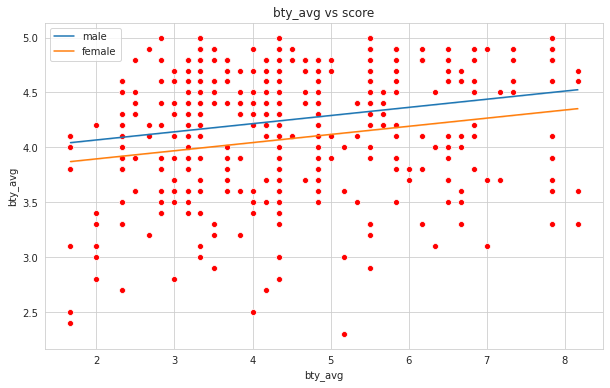

In [8]:
model_fit2.params
male_line = model_fit2.params[0] + model_fit2.params[1]*courseEval['bty_avg'] + model_fit2.params[2]*0
female_line = model_fit2.params[0] + model_fit2.params[1]*courseEval['bty_avg'] + model_fit2.params[2]*1

plt.figure(figsize=(10,6)) 
plt.title("bty_avg vs score")
sns.scatterplot(x = courseEval['bty_avg'], y = courseEval['score'], color = 'red')
sns.lineplot(x = courseEval['bty_avg'], y = male_line, label = "male")
sns.lineplot(x = courseEval['bty_avg'], y = female_line, label = "female")
plt.show()

Answer: Female professors with the same beauty receive a lower score than male professors.

### <span style="color:red"> Question 4 </span>
P-values and parameter estimates should only be trusted if the conditions for the regression are reasonable. Verify that the conditions for this model are reasonable using diagnostic plots. To check the model conditions you will need to make the following plots (see page 271 of the book for more details about assumptions and example plots): 
* scatterplot of the (absolute) residuals (y-axis) against the predicted values (x-axis)
* a histogram and QQ-plot of the residuals
* scatterplot of the residuals (y-axis) against the order of collection (x-axis) 
* scatterplots of the residuals (y-axis) against each response variable (x-axis)

Make sure you use subplots (plt.subplot) to order these plots in a structured  manner.  

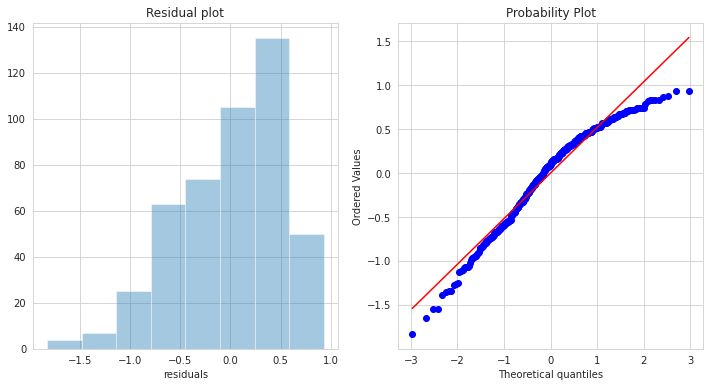

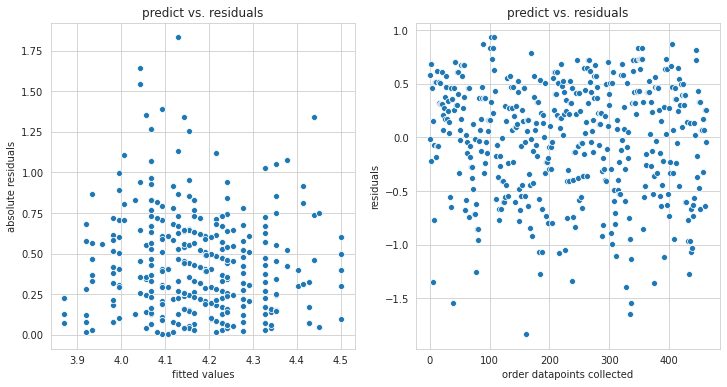

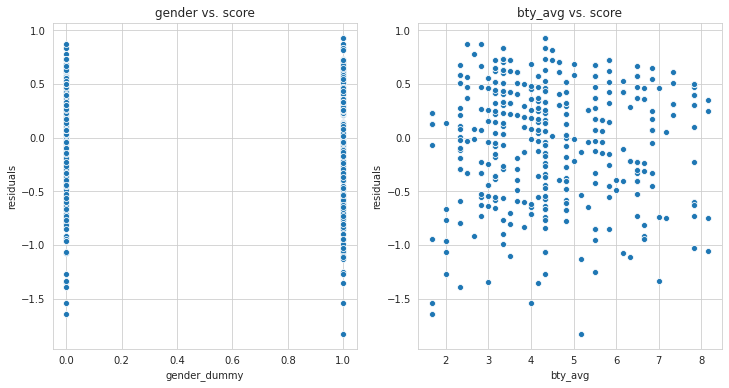

In [14]:
predict = model_fit2.params[0] + model_fit2.params[1]*courseEval['bty_avg'] + model_fit2.params[2]*courseEval['gender_dummy']
r2 = model_fit2.rsquared
residual_values = courseEval['score']-predict

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Residual plot")
sns.distplot(residual_values, kde = False, rug = False, bins = 8)
plt.xlabel('residuals')

plt.subplot(1,2,2)
from scipy.stats import probplot
probplot(residual_values, plot = plt)
plt.show();

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("predict vs. residuals")
sns.scatterplot(x = predict, y = np.abs(residual_values))
plt.ylabel('absolute residuals')
plt.xlabel('fitted values')

plt.subplot(1,2,2)
plt.title("predict vs. residuals")
sns.scatterplot(x = np.arange(0,len(residual_values)), y = residual_values)
plt.ylabel('residuals')
plt.xlabel('order datapoints collected')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("gender vs. residuals")
sns.scatterplot(x = courseEval['gender_dummy'], y = residual_values)
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.title("bty_avg vs. residuals")
sns.scatterplot(x = courseEval['bty_avg'], y = residual_values)
plt.ylabel('residuals')
plt.show()


The residuals are not normally distributed. However, given the large number of cases that is not a big issue. There is no evidence for non-linear associations and the variance seems to be (reasonably) constant. 

## <span style="color:red"> The search for the best model </span>
We will start with a full model that predicts professor score based on  ethnicity, gender, language of the university where they got their degree, age, proportion of students that filled out evaluations, class size, course level, number of professors, number of credits, average beauty rating, outfit, and picture color.

In [16]:
m_full = sm.formula.ols(formula = 'score ~ ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + bty_avg + pic_outfit + pic_color', data = courseEval)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     8.264
Date:                Mon, 25 May 2020   Prob (F-statistic):           3.79e-14
Time:                        12:15:41   Log-Likelihood:                -328.37
No. Observations:                 463   AIC:                             682.7
Df Residuals:                     450   BIC:                             736.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### <span style="color:red"> Question 5 </span>
Interpret the coefficient associated with the ethnicity variable.

Answer: keeping everything else constant, having an ethnicity that is not a minority ethnicity is associated with higher student ratings. The p-value is 0.058, suggesting that it is bordering statistical significance. 

### <span style="color:red"> Question 6 </span>
Drop the variable with the highest p-value and re-fit the model. Did the coefficients and significance of the other explanatory variables change? (One of the things that makes multiple regression interesting is that coefficient estimates depend on the other variables that are included in the model.) If not, what does this say about whether or not the dropped variable was collinear with the other explanatory variables?

In [17]:
import statsmodels.api as sm

m_full = sm.formula.ols(formula = 'score ~  ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_credits + bty_avg + pic_outfit + pic_color', data = courseEval)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     9.026
Date:                Mon, 25 May 2020   Prob (F-statistic):           1.26e-14
Time:                        12:15:44   Log-Likelihood:                -328.41
No. Observations:                 463   AIC:                             680.8
Df Residuals:                     451   BIC:                             730.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Answer:
The model coefficients do not change much, suggesting that the cls_profs variable does not correlate highly with other variables. 

### <span style="color:red"> Question 7 </span>
Using backward-selection and p-value as the selection criterion, determine the best model. You do not need to show all steps in your answer, just the output for the final model. 

In [18]:
m_full = sm.formula.ols(formula = 'score ~  ethnicity + gender + language + age + cls_perc_eval + cls_credits + bty_avg + pic_color', data = courseEval)
multi_reg = m_full.fit()
print(multi_reg.summary())



                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     11.80
Date:                Mon, 25 May 2020   Prob (F-statistic):           2.58e-15
Time:                        12:15:47   Log-Likelihood:                -330.74
No. Observations:                 463   AIC:                             679.5
Df Residuals:                     454   BIC:                             716.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### <span style="color:red"> Question 8 </span>
Verify that the conditions for this model are reasonable using diagnostic plots.
To get the predicted values for a regression model, you can use the *predict* function in your regression model object, so for the example above question 5 that would be: predicted_value = multi_reg.predict(). Make sure you use subplots to order the diagnostic plots in a structured  manner.  

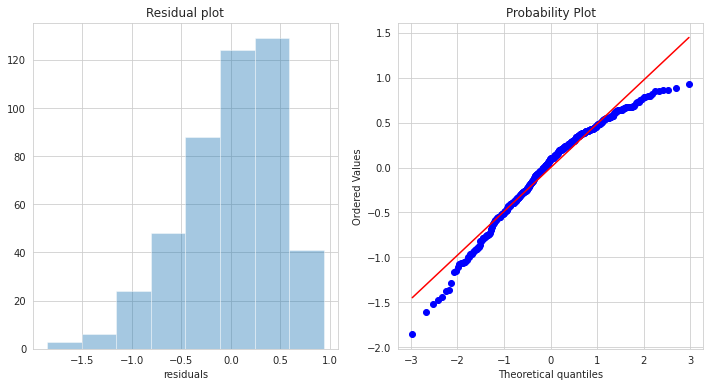

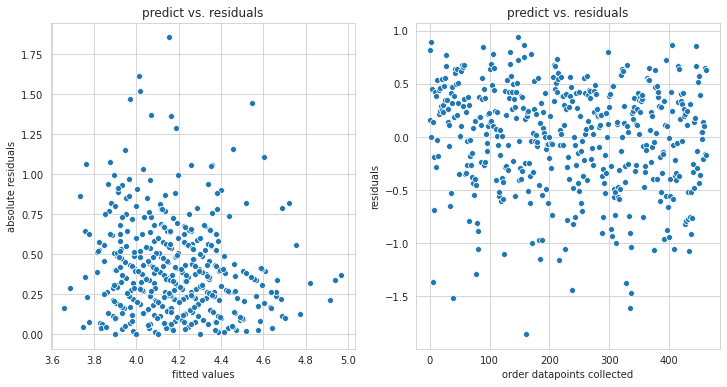

Text(0, 0.5, 'residuals')

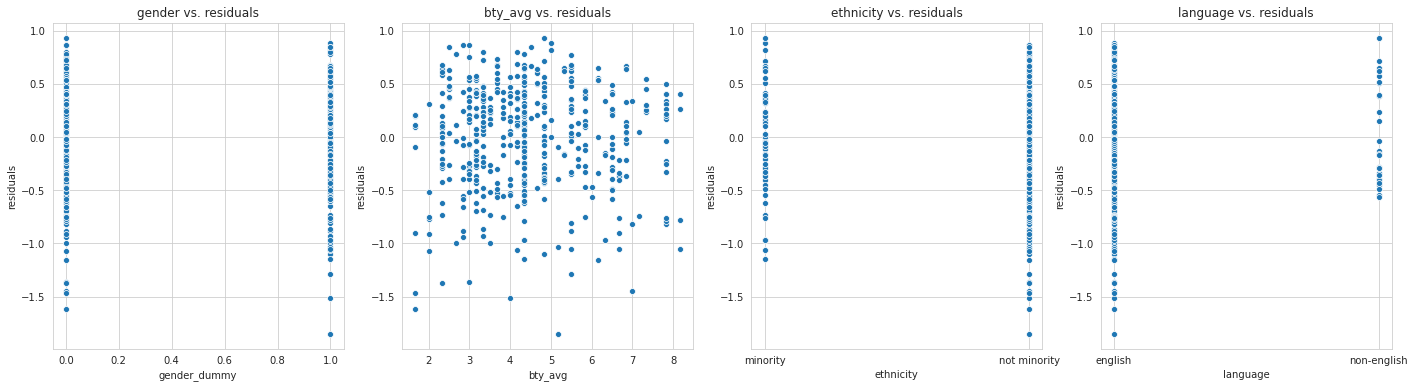

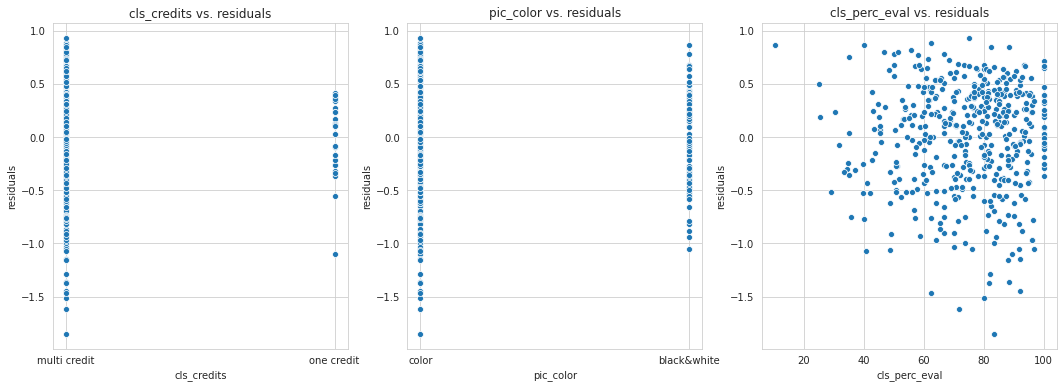

In [24]:
predict = multi_reg.predict()
r2 = multi_reg.rsquared
residual_values = courseEval['score']-predict

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Residual plot")
sns.distplot(residual_values, kde = False, rug = False, bins = 8)
plt.xlabel('residuals')

plt.subplot(1,2,2)
probplot(residual_values, plot = plt)
plt.show();

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("predict vs. residuals")
sns.scatterplot(x = predict, y = np.abs(residual_values))
plt.ylabel('absolute residuals')
plt.xlabel('fitted values')

plt.subplot(1,2,2)
plt.title("predict vs. residuals")
sns.scatterplot(x = np.arange(0,len(residual_values)), y = residual_values)
plt.ylabel('residuals')
plt.xlabel('order datapoints collected')
plt.show()

plt.figure(figsize=(24,6))
plt.subplot(1,4,1)
plt.title("gender vs. residuals")
sns.scatterplot(x = courseEval['gender_dummy'], y = residual_values)
plt.ylabel('residuals')

plt.subplot(1,4,2)
plt.title("bty_avg vs. residuals")
sns.scatterplot(x = courseEval['bty_avg'], y = residual_values)
plt.ylabel('residuals')

plt.subplot(1,4,3)
plt.title("ethnicity vs. residuals")
sns.scatterplot(x = courseEval['ethnicity'], y = residual_values)
plt.ylabel('residuals')

plt.subplot(1,4,4)
plt.title("language vs. residuals")
sns.scatterplot(x = courseEval['language'], y = residual_values)
plt.ylabel('residuals')

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title("cls_credits vs. residuals")
sns.scatterplot(x = courseEval['cls_credits'], y = residual_values)
plt.ylabel('residuals')

plt.subplot(1,3,2)
plt.title("pic_color vs. residuals")
sns.scatterplot(x = courseEval['pic_color'], y = residual_values)
plt.ylabel('residuals')

plt.subplot(1,3,3)
plt.title("cls_perc_eval vs. residuals")
sns.scatterplot(x = courseEval['cls_perc_eval'], y = residual_values)
plt.ylabel('residuals')



Answer: we see the same issues with the non-normality of the residuals. In addition, some of the variables suggest that the variance is not constant. In particular, the language and cls_credit variables, suggesting that we should interpret those coefficients with caution. There is no sign of non-linear associations or non-independent data-points. 

### <span style="color:red"> Question 9 </span>
The original paper describes how these data were gathered by taking a sample of professors from the University of Texas at Austin and including all courses that they have taught. Considering that each row represents a course, could this new information have an impact on any of the conditions of linear regression?

Yes, this would suggest that the residuals are not independent, so one of the important assumptions of our model does not hold. 

### <span style="color:red"> Question 10 </span>
Based on your final model, describe the characteristics of a professor and course at University of Texas at Austin that would be associated with a high evaluation score. Would you be comfortable generalizing your conclusions to apply to professors generally (at any university)? Why or why not?

Answer: Our model predicts that a professor who receives a high evaluations score is: male, beatiful, not a minority, studied at an english speaking univerity,had a black and white photo, is young, taught a one-credit course and had evaluations from a high percentage of students. 

We cannot generalize this to other universities because our sample was drawn from a very specific population. It is likely that different factors play a role at different universities. In addition, we should interpret some of these effects with caution because not all of the assumptions for our multiple regression model hold.  